# Clustering project

Descrição

## Importing data and libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import *
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import *
from copy import deepcopy
from py_files.helping_functions import *

In [2]:
cust_basket = pd.read_csv('data/customer_basket.csv')
cust_info = pd.read_csv('data/customer_info.csv', index_col=0)
product_mapping = pd.read_excel('data/product_mapping.xlsx')

## Exploratory Data Analysis

### Data cleaning and preprocessing

In [3]:
# Initial visualizations
display(cust_info.head())
display(cust_info.info())
display(cust_info.describe())
display(cust_info.describe(include=object))

display(cust_basket.head())
display(cust_basket.info())
display(cust_basket.describe())
display(cust_basket.describe(include=object))

product_mapping

,customer_id,customer_name,customer_gender,customer_birthdate,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,...,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_spend_petfood,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude
0,39634,David Frink,male,05/15/1964 10:34 PM,1.0,1.0,1.0,2.0,18306.0,7106.0,...,4056.0,2174.0,3946.0,2514.0,32.0,0.072206,2010.0,NaN,38.735637,-9.149071
1,43460,Belinda Terry,female,03/26/1988 11:06 PM,1.0,0.0,1.0,2.0,5015.0,1334.0,...,1925.0,2115.0,1028.0,1987.0,2566.0,0.206227,2014.0,NaN,38.762702,-9.160802
2,23937,Evelyn Calico,female,04/13/1969 06:07 PM,0.0,1.0,1.0,3.0,3097.0,4073.0,...,2347.0,1306.0,1504.0,2018.0,1282.0,0.136168,2009.0,951127.0,38.717431,-9.165105
3,2431,Ora Boggess,female,06/15/1941 03:26 AM,0.0,0.0,0.0,1.0,10825.0,207.0,...,151.0,53.0,0.0,4135.0,70.0,0.215852,2007.0,958680.0,38.782169,-9.150318
4,10090,Lonnie Hopson,male,12/18/2001 03:03 AM,0.0,0.0,0.0,1.0,697.0,570.0,...,172.0,587.0,223.0,64.0,4.0,0.181023,2024.0,977059.0,38.770397,-9.177024


<class 'pandas.core.frame.DataFrame'>
Index: 43631 entries, 0 to 43630
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customer_id                              43631 non-null  int64  
 1   customer_name                            43631 non-null  object 
 2   customer_gender                          43631 non-null  object 
 3   customer_birthdate                       43631 non-null  object 
 4   kids_home                                43107 non-null  float64
 5   teens_home                               42610 non-null  float64
 6   number_complaints                        42977 non-null  float64
 7   distinct_stores_visited                  42322 non-null  float64
 8   lifetime_spend_groceries                 43631 non-null  float64
 9   lifetime_spend_electronics               43631 non-null  float64
 10  typical_hour                             41886 non-

None

,customer_id,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,lifetime_spend_nonalcohol_drinks,...,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_spend_petfood,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude
count,43631.000000,43107.000000,42610.000000,42977.000000,42322.000000,43631.000000,43631.000000,41886.000000,42758.000000,43631.000000,...,42322.000000,43631.000000,43631.000000,43631.000000,43631.000000,43631.000000,43631.000000,24654.000000,43631.000000,43631.000000
mean,24993.120877,1.081263,0.847829,0.705726,1.669959,5600.030047,2000.058468,13.520580,456.893938,443.636657,...,1471.423846,916.948408,990.334922,2023.225619,387.260182,0.229431,2011.342257,949808.661069,38.752266,-9.158591
std,14426.310863,1.239257,0.840397,0.624624,1.034825,4602.647746,3004.924537,4.558057,312.832282,210.313287,...,3910.163766,729.744050,1241.658577,2926.355387,411.436756,0.189242,4.656129,28894.251301,0.048629,0.036606
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,6.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.477986,1996.000000,900008.000000,38.690636,-9.418076
25%,12521.500000,0.000000,0.000000,0.000000,1.000000,2184.500000,218.000000,10.000000,227.000000,297.000000,...,187.000000,372.000000,204.000000,517.000000,97.000000,0.111704,2008.000000,924774.000000,38.732481,-9.175824
50%,24988.000000,1.000000,1.000000,1.000000,1.000000,4071.000000,574.000000,13.000000,387.000000,419.000000,...,641.000000,668.000000,557.000000,874.000000,252.000000,0.205235,2011.000000,949681.000000,38.748887,-9.160152
75%,37484.500000,1.000000,1.000000,1.000000,2.000000,6605.500000,2565.500000,17.000000,584.000000,560.000000,...,1570.000000,1437.000000,1111.000000,2217.000000,537.000000,0.310884,2014.000000,975117.250000,38.764504,-9.139240
max,50000.000000,9.000000,6.000000,9.000000,8.000000,26552.000000,21273.000000,24.000000,2112.000000,2224.000000,...,50381.000000,3487.000000,5389.000000,19596.000000,3544.000000,1.196858,2024.000000,999996.000000,39.357600,-9.055377


,customer_name,customer_gender,customer_birthdate
count,43631,43631,43631
unique,42351,2,43594
top,James Brown,female,08/13/1962 08:48 PM
freq,10,21910,2


,invoice_id,list_of_goods,customer_id
0,7448187,"['olive oil', 'yogurt cake', 'grated cheese', ...",43134
1,3167314,"['babies food', 'shower gel', 'rice', 'black b...",43134
2,10199712,"['babies food', 'barbecue sauce', 'olive oil',...",43134
3,12179179,"['babies food', 'milk', 'rice', 'yogurt cake',...",43134
4,8292388,"['napkins', 'cookies', 'razor', 'cooking oil',...",43134


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89952 entries, 0 to 89951
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   invoice_id     89952 non-null  int64 
 1   list_of_goods  89952 non-null  object
 2   customer_id    89952 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.1+ MB


None

,invoice_id,customer_id
count,8.995200e+04,89952.000000
mean,6.126259e+06,21855.193915
std,3.527265e+06,12610.661213
min,2.006600e+04,1.000000
25%,3.085110e+06,10814.000000
50%,6.133909e+06,21904.000000
75%,9.185876e+06,32771.000000
max,1.224224e+07,43631.000000


,list_of_goods
count,89952
unique,88767
top,"['babies food', 'cooking oil']"
freq,25


,product_name,category
0,champagne,alcohol_drinks
1,bramble,alcohol_drinks
2,white wine,alcohol_drinks
3,dessert wine,alcohol_drinks
4,french wine,alcohol_drinks
...,...,...
160,final fantasy XX,videogames
161,final fantasy XIX,videogames
162,final fantasy XXII,videogames
163,dog food,pet food


In [5]:
def cust_info_preproc(df):
    cust_info = deepcopy(df)

    # Convert birth date to datetime and extract age
    cust_info['customer_birthdate'] = pd.to_datetime(cust_info['customer_birthdate'])
    cust_info['age'] = cust_info['customer_birthdate'].apply(lambda x: (pd.Timestamp.now() - x).days // 365)

    # Drop non-numeric columns for imputation
    numeric_cols = cust_info.select_dtypes(include=[np.number]).columns
    non_numeric_cols = cust_info.select_dtypes(exclude=[np.number]).columns

    # Missing values: KNN Imputation
    imputer = KNNImputer(n_neighbors=5)
    cust_info[numeric_cols] = imputer.fit_transform(cust_info[numeric_cols])

    # Standardization
    scaler = RobustScaler()
    cust_info[numeric_cols] = scaler.fit_transform(cust_info[numeric_cols])

    # Combine numeric and non-numeric columns back
    cust_info = pd.concat([cust_info[non_numeric_cols], cust_info[numeric_cols]], axis=1)

    return cust_info

In [5]:
info_treated = cust_info_preproc(cust_info)

C:\Users\loure\AppData\Local\Temp\ipykernel_26108\1352673333.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cust_info['customer_birthdate'] = pd.to_datetime(cust_info['customer_birthdate'])


KeyboardInterrupt: 

In [ ]:
def cust_basket_preproc(df):
    cust_basket = deepcopy(df)
    # Convert purchases from strings to actual lists
    cust_basket['list_of_goods'] = cust_basket['list_of_goods'].apply(eval)

    # Create a dictionary from product mapping
    product_mapping_dict = pd.Series(product_mapping['category'].values, index=product_mapping['product_name']).to_dict()

    # Map each item in the list_of_goods to its category
    cust_basket['categories'] = cust_basket['list_of_goods'].apply(lambda x: [product_mapping_dict.get(item, 'Unknown') for item in x])

    # Create the category columns with counts of items purchased in each category
    for category in product_mapping['category'].unique():
        cust_basket[category] = cust_basket['categories'].apply(lambda x: x.count(category))

    # Drop the intermediate 'categories' column
    cust_basket = cust_basket.drop(columns=['categories'])

    return cust_basket

In [ ]:
basket_treated = cust_basket_preproc(cust_basket, product_mapping)

### Visualizations

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_distributions_grid(dataframe, figsize=(20, 15), bins=30):
    """
    Plot a grid of distributions for all variables in the dataframe.

    Parameters:
    - dataframe: DataFrame containing data to plot.
    - figsize: Tuple specifying the figure size. Default is (20, 15).
    - bins: Number of bins for histograms. Default is 30.
    """
    # Separate numerical and categorical columns
    numerical_cols = dataframe.select_dtypes(include=['number']).columns
    categorical_cols = dataframe.select_dtypes(include=['object']).columns

    # Calculate the number of rows and columns for the subplot grid
    total_cols = len(numerical_cols) + len(categorical_cols)
    grid_size = int(total_cols ** 0.5) + 1

    # Create subplots
    fig, axes = plt.subplots(nrows=grid_size, ncols=grid_size, figsize=figsize)
    axes = axes.flatten()

    # Plot numerical variables
    for i, numerical_col in enumerate(numerical_cols):
        ax = axes[i]
        sns.histplot(data=dataframe, x=numerical_col, bins=bins, ax=ax, kde=True)
        ax.set_title(f'Distribution of {numerical_col}')
        ax.set_xlabel('')
        ax.set_ylabel('Frequency')

    # Plot categorical variables
    for i, categorical_col in enumerate(categorical_cols, start=len(numerical_cols)):
        ax = axes[i]
        sns.countplot(data=dataframe, x=categorical_col, ax=ax)
        ax.set_title(f'Distribution of {categorical_col}')
        ax.set_xlabel('')
        ax.set_ylabel('Count')

    # Remove any unused subplots
    for j in range(total_cols, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

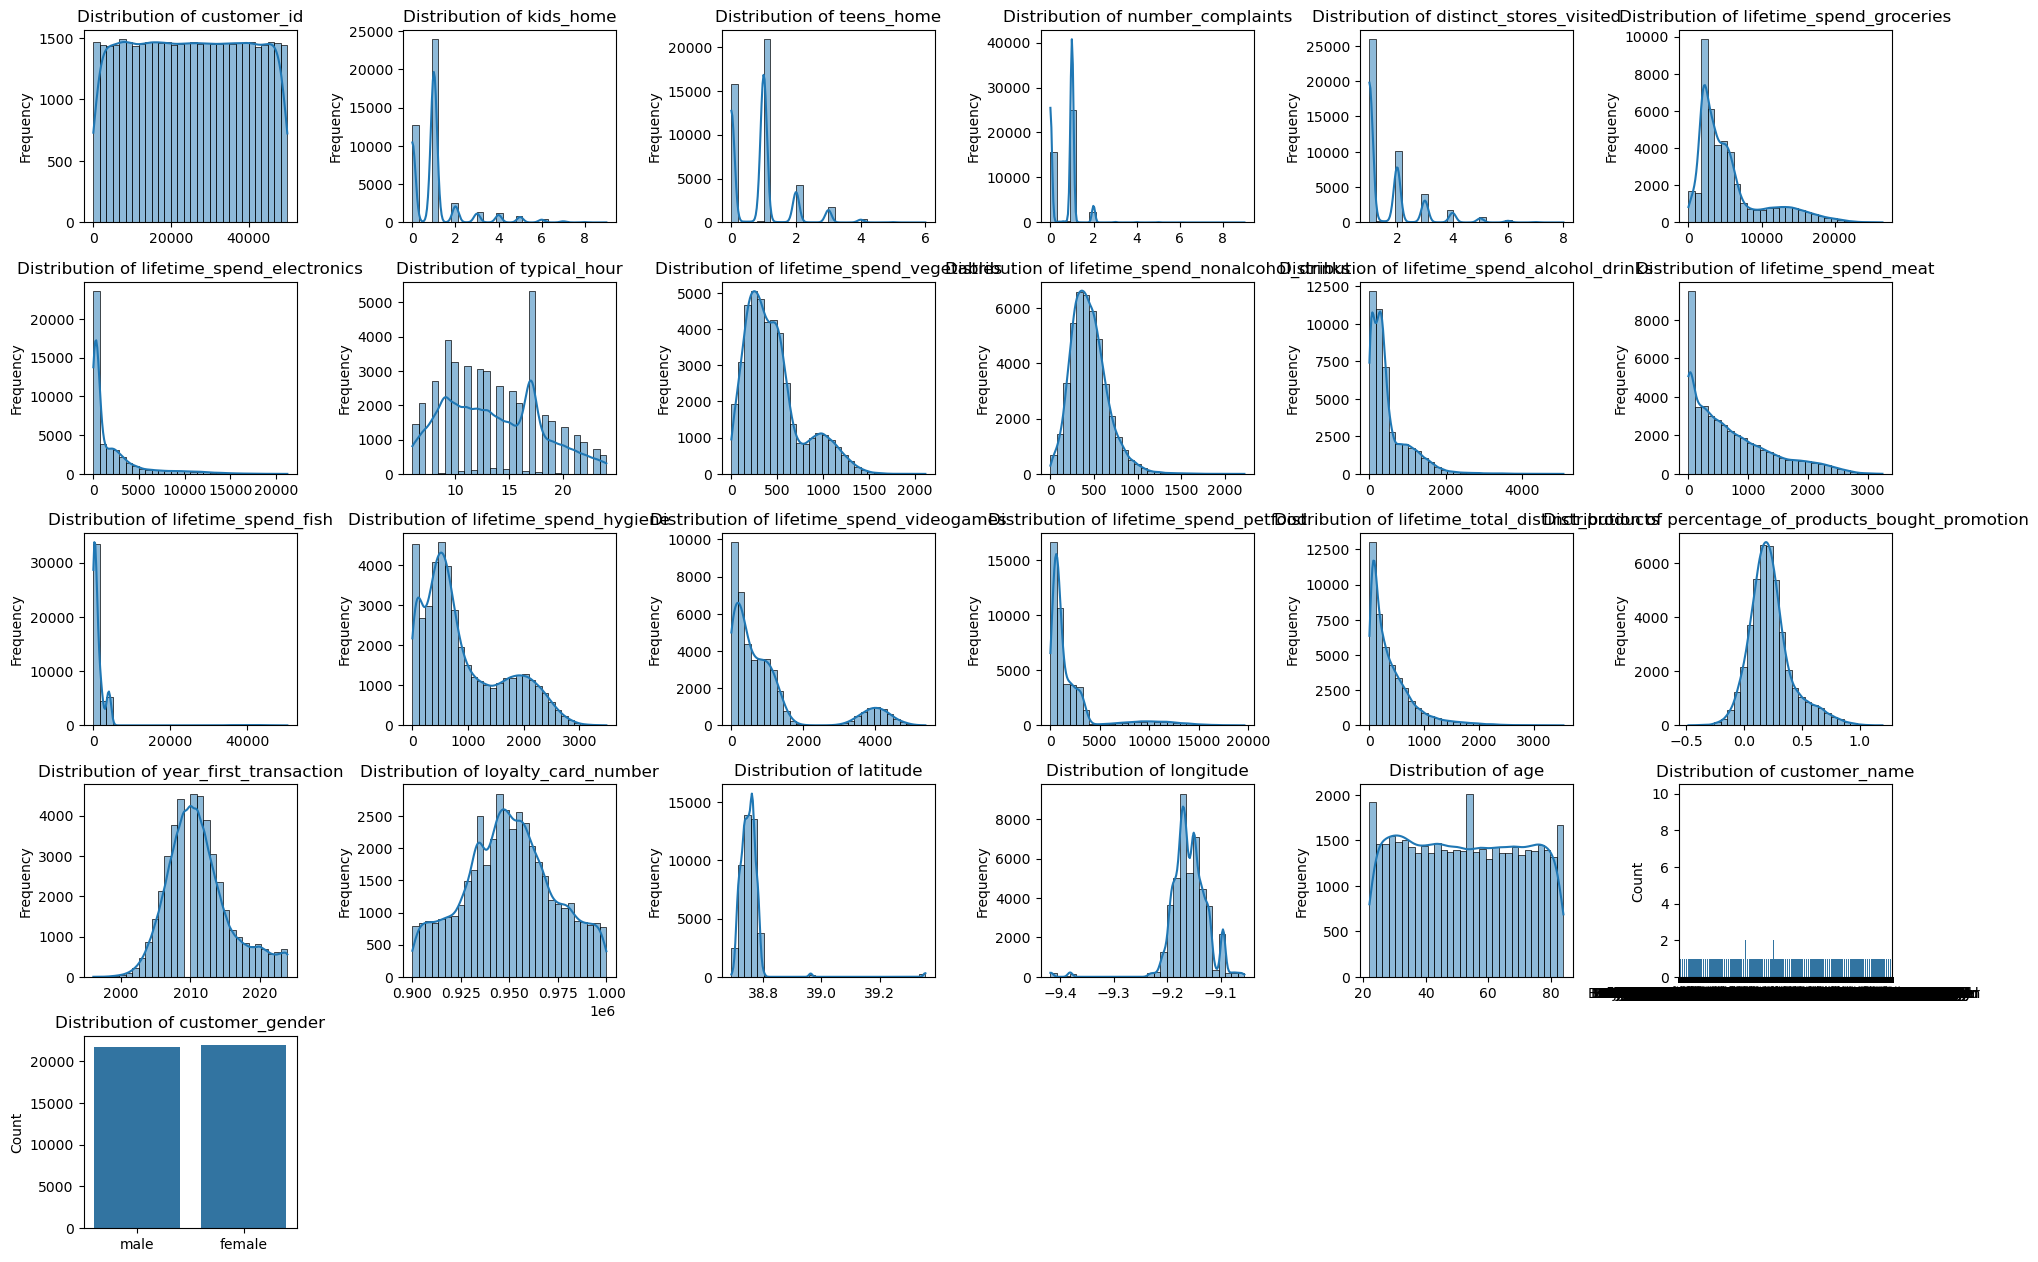

In [ ]:
plot_distributions_grid(cust_info, figsize=(20, 15), bins=30)

#### Analysis

Variables to un-skew:
- lifetime_tudo

Outliers and anomalies:
- Latitude-Longitude
- Videogames
- Fish
- Petfood
- Hygiene
- Alcohol
- Vegetables

Correlations and relationships:

## Customer Segmentation

In [14]:
customers=cust_info.copy()
customers, fishermen = find_fishermen(customers)
customers

,customer_id,customer_name,customer_gender,customer_birthdate,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,...,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_spend_petfood,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude
0,39634,David Frink,male,05/15/1964 10:34 PM,1.0,1.0,1.0,2.0,18306.0,7106.0,...,4056.0,2174.0,3946.0,2514.0,32.0,0.072206,2010.0,NaN,38.735637,-9.149071
1,43460,Belinda Terry,female,03/26/1988 11:06 PM,1.0,0.0,1.0,2.0,5015.0,1334.0,...,1925.0,2115.0,1028.0,1987.0,2566.0,0.206227,2014.0,NaN,38.762702,-9.160802
2,23937,Evelyn Calico,female,04/13/1969 06:07 PM,0.0,1.0,1.0,3.0,3097.0,4073.0,...,2347.0,1306.0,1504.0,2018.0,1282.0,0.136168,2009.0,951127.0,38.717431,-9.165105
3,2431,Ora Boggess,female,06/15/1941 03:26 AM,0.0,0.0,0.0,1.0,10825.0,207.0,...,151.0,53.0,0.0,4135.0,70.0,0.215852,2007.0,958680.0,38.782169,-9.150318
4,10090,Lonnie Hopson,male,12/18/2001 03:03 AM,0.0,0.0,0.0,1.0,697.0,570.0,...,172.0,587.0,223.0,64.0,4.0,0.181023,2024.0,977059.0,38.770397,-9.177024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43626,48487,Amelia Crawford,female,08/28/1983 11:43 AM,1.0,1.0,0.0,1.0,7189.0,6293.0,...,3779.0,1748.0,4387.0,2812.0,14.0,0.233259,2016.0,NaN,38.760694,-9.166146
43627,24856,Silvia Ramos,female,09/21/1992 07:16 PM,1.0,1.0,1.0,1.0,11238.0,11490.0,...,3893.0,1621.0,3831.0,2726.0,25.0,0.060977,2014.0,909859.0,38.760280,-9.166643
43628,21373,Addie Coronel,female,02/20/1994 05:58 AM,0.0,0.0,0.0,1.0,6059.0,241.0,...,142.0,179.0,0.0,11242.0,44.0,0.097672,2017.0,NaN,38.769923,-9.181550
43629,19527,Msc. Mary Ross,female,08/06/1989 04:39 PM,1.0,0.0,1.0,1.0,3098.0,425.0,...,0.0,393.0,210.0,422.0,178.0,0.182188,2007.0,933102.0,38.760889,-9.174663


In [8]:
customers, pet_shelters = find_outliers(customers, "lifetime_spend_petfood", 3)
pet_shelters.sort_values(by="lifetime_spend_petfood", ascending=False)

c:\Users\loure\Documents\GitHub\ML2_Project\py_files\helping_functions.py:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = datacopy[(data[column] > mean + threshold*std)]


,customer_id,customer_name,customer_gender,customer_birthdate,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,...,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_spend_petfood,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude
16230,32635,Pamela Mccray,female,05/11/1947 03:51 PM,0.0,0.0,1.0,1.0,8714.0,11.0,...,131.0,74.0,0.0,19596.0,35.0,0.321182,2011.0,NaN,38.712248,-9.182065
7655,35001,Diana Davis,female,09/18/1948 12:18 PM,0.0,0.0,1.0,1.0,11186.0,119.0,...,384.0,7.0,0.0,19578.0,41.0,0.054537,2009.0,NaN,38.749753,-9.211479
10103,44864,Melinda Stieger,female,09/10/1965 08:32 PM,0.0,0.0,0.0,1.0,7214.0,361.0,...,114.0,73.0,0.0,19303.0,21.0,0.180400,2012.0,NaN,38.724726,-9.163159
29371,11186,Marion Mills,female,07/02/2001 07:17 AM,0.0,0.0,NaN,1.0,251.0,149.0,...,287.0,146.0,0.0,19080.0,90.0,0.242106,2024.0,NaN,38.713623,-9.173949
34415,33886,Mary Kivett,female,06/10/1968 10:15 AM,0.0,0.0,1.0,1.0,5057.0,184.0,...,56.0,80.0,0.0,19044.0,49.0,0.143244,2012.0,NaN,38.746739,-9.134414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35531,18951,William Patterson,male,07/29/1961 10:28 PM,0.0,0.0,1.0,1.0,3068.0,62.0,...,144.0,78.0,0.0,10852.0,23.0,0.059006,2010.0,NaN,38.765766,-9.198785
17749,18443,Harvey Quinn,male,03/07/1968 12:41 AM,0.0,0.0,1.0,1.0,11361.0,466.0,...,238.0,22.0,0.0,10852.0,65.0,0.257057,2011.0,NaN,38.732646,-9.151039
32539,32878,Velvet Evans,female,12/28/1951 08:47 AM,0.0,0.0,1.0,1.0,12658.0,51.0,...,144.0,140.0,0.0,10850.0,70.0,0.143642,2009.0,NaN,38.731311,-9.188223
25226,36241,Jeffrey Brown,male,01/05/1942 10:27 PM,0.0,0.0,0.0,1.0,11003.0,458.0,...,62.0,24.0,0.0,10848.0,72.0,0.161838,2012.0,NaN,38.770273,-9.208014


In [51]:
#so temosoutliers com threshold = 1, so assumo q n haja, mas amanha vejo melhor, fazer função que compara varios lifetime spends
#customers, electronics = find_outliers(customers, "lifetime_spend_electronics", 1)
#electronics.sort_values("lifetime_spend_electronics", ascending=False)

,customer_id,customer_name,customer_gender,customer_birthdate,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,...,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_spend_petfood,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude
18637,35380,Peter Mccoy,male,06/14/1955 08:16 AM,0.0,0.0,NaN,1.0,14048.0,644.0,...,232.0,50.0,0.0,7380.0,86.0,0.227141,2009.0,NaN,38.761358,-9.155554
38728,354,Kelly Edmond,female,05/07/1962 10:50 AM,0.0,0.0,1.0,1.0,12476.0,631.0,...,138.0,0.0,0.0,7882.0,2.0,-0.075248,2008.0,931023.0,38.722851,-9.150391
3244,18239,Maria Cortez,female,04/29/1955 09:39 AM,0.0,0.0,1.0,1.0,11641.0,629.0,...,177.0,26.0,0.0,7053.0,24.0,0.369674,2004.0,NaN,38.762777,-9.161039
39082,39255,Joseph Bickford,male,03/01/1958 09:38 AM,0.0,0.0,1.0,1.0,2604.0,583.0,...,248.0,123.0,0.0,6181.0,91.0,0.060041,2007.0,NaN,38.782230,-9.135575
21225,24377,Eugene Kauffman,male,07/04/1998 04:40 AM,0.0,1.0,0.0,1.0,5961.0,567.0,...,104.0,45.0,0.0,7555.0,72.0,0.323524,2021.0,NaN,38.744037,-9.179690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14730,45951,Jason Boyer,male,06/01/1958 08:18 PM,0.0,0.0,0.0,1.0,9023.0,2.0,...,229.0,32.0,0.0,5482.0,20.0,0.238618,2012.0,NaN,38.769279,-9.179189
29562,18757,Dale Pena,male,08/29/1959 09:52 AM,0.0,0.0,1.0,1.0,13260.0,1.0,...,221.0,77.0,0.0,7847.0,66.0,0.204806,2012.0,NaN,38.709157,-9.135203
17214,23828,Christine Williams,female,08/21/1986 03:22 AM,0.0,0.0,1.0,1.0,12898.0,1.0,...,167.0,67.0,0.0,6661.0,87.0,0.308200,2014.0,NaN,38.764988,-9.170062
7885,38407,Jessica Flipp,female,05/08/1950 10:05 PM,0.0,0.0,1.0,1.0,16134.0,1.0,...,359.0,115.0,0.0,7778.0,63.0,0.152028,2012.0,NaN,38.748229,-9.189026


In [17]:
customers, alcoholics = find_outliers(customers, "lifetime_spend_alcohol_drinks", 3)
alcoholics.sort_values("lifetime_spend_groceries")

c:\Users\loure\Documents\GitHub\ML2_Project\py_files\helping_functions.py:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = datacopy[(data[column] > mean + threshold*std)]


,customer_id,customer_name,customer_gender,customer_birthdate,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,lifetime_spend_nonalcohol_drinks,lifetime_spend_alcohol_drinks,lifetime_spend_meat,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_spend_petfood,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude
20725,20532,Stuart Thompson,male,03/31/1999 01:33 PM,1.0,0.0,0.0,1.0,132.0,579.0,23.0,114.0,257.0,1706.0,146.0,91.0,134.0,230.0,75.0,117.0,0.128988,2022.0,934057.0,38.715738,-9.159137
18094,35988,Chester Bosak,male,06/27/2001 02:08 AM,0.0,0.0,0.0,1.0,144.0,465.0,19.0,37.0,765.0,1716.0,402.0,401.0,208.0,344.0,22.0,17.0,-0.024896,2024.0,NaN,38.696834,-9.169524
43041,14649,Susan Moreland,female,08/04/1999 08:20 PM,1.0,1.0,0.0,3.0,171.0,1019.0,9.0,231.0,182.0,1783.0,101.0,1064.0,505.0,190.0,293.0,244.0,0.482676,2022.0,914098.0,38.707778,-9.124866
3165,8620,Robert Stacy,male,02/03/2001 02:25 PM,0.0,0.0,0.0,3.0,262.0,455.0,16.0,34.0,724.0,1746.0,213.0,239.0,88.0,266.0,119.0,13.0,0.038165,2024.0,954996.0,38.740222,-9.155601
9653,45172,Lamont Odell,male,03/31/1956 01:59 AM,1.0,NaN,3.0,1.0,263.0,1090.0,9.0,321.0,256.0,1710.0,626.0,431.0,1447.0,942.0,886.0,615.0,0.047708,2011.0,NaN,38.727922,-9.191613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7067,11555,Msc. Jeffrey Rodriguez,male,05/08/1980 10:31 PM,1.0,1.0,1.0,1.0,20429.0,9149.0,6.0,461.0,499.0,1762.0,1910.0,4827.0,2098.0,4226.0,3245.0,77.0,0.151492,2011.0,952373.0,38.748823,-9.173071
28579,33967,Sharon Smith,female,12/20/1940 05:46 PM,1.0,1.0,0.0,1.0,20449.0,9765.0,21.0,447.0,629.0,1782.0,1586.0,3912.0,2513.0,4267.0,2797.0,55.0,0.098797,2011.0,NaN,38.763014,-9.095780
36556,5143,Msc. Timothy Crigler,male,12/12/1940 04:39 PM,1.0,1.0,0.0,2.0,21938.0,7560.0,17.0,593.0,687.0,1750.0,1882.0,4235.0,1628.0,3935.0,2866.0,132.0,0.059580,2011.0,912637.0,38.736684,-9.150101
3917,41280,Lenore Johnston,female,06/27/1984 01:46 AM,1.0,1.0,0.0,2.0,24601.0,11017.0,14.0,516.0,218.0,1752.0,2099.0,4376.0,1921.0,4307.0,2579.0,166.0,0.139603,2008.0,NaN,38.735769,-9.149512


### Clustering

In [ ]:
# Select relevant columns for clustering
features = cust_info.drop(columns=['customer_id', 'customer_name', 'customer_gender', 'customer_birthdate', 'loyalty_card_number', 'latitude', 'longitude'])

# Standardize the data
scaler = RobustScaler()
scaled_features = scaler.fit_transform(features)

# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=5)
cust_info['cluster'] = agg_clustering.fit_predict(scaled_features)

c:\Users\msard\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\msard\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


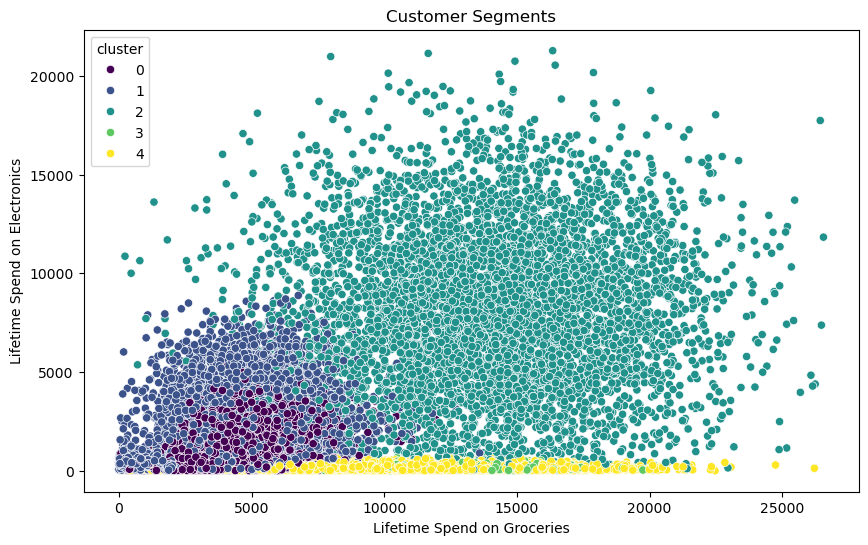

In [ ]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lifetime_spend_groceries', y='lifetime_spend_electronics', hue='cluster', data=cust_info, palette='viridis')
plt.title('Customer Segments')
plt.xlabel('Lifetime Spend on Groceries')
plt.ylabel('Lifetime Spend on Electronics')
plt.show()

### Segment Descriptions

In [ ]:
# Separate numerical and categorical columns
numerical_cols = cust_info.select_dtypes(include=['number']).columns
categorical_cols = cust_info.select_dtypes(include=['object']).columns

# Define aggregation functions
aggregation = {col: 'mean' for col in numerical_cols}
aggregation.update({col: lambda x: x.mode().iloc[0] for col in categorical_cols})

# Analyze purchasing patterns per cluster
cluster_summary = cust_info.groupby('cluster').agg(aggregation)

# Print the summary statistics
display(cluster_summary)


,customer_id,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,lifetime_spend_nonalcohol_drinks,...,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude,age,cluster,customer_name,customer_gender
cluster,,,,,,,,,,,,,,,,,,,,,
0,24823.885776,1.981849,1.195116,0.743960,1.170969,3952.705759,1182.078071,15.545167,756.010079,397.469579,...,360.941803,0.198368,2011.116869,949850.289317,38.748680,-9.156263,54.349657,0.0,Anthony Smith,female
1,25155.018048,0.659827,0.737229,0.786797,2.313595,3148.236504,1251.002901,12.353870,268.124295,424.047859,...,579.019391,0.312278,2011.649460,948479.921448,38.747385,-9.155775,49.796261,1.0,James Brown,male
2,25076.643578,1.001630,0.995748,0.500726,1.389300,14012.167050,8112.772011,13.625828,499.543667,596.570593,...,100.733747,0.049657,2011.142250,950113.733392,38.752249,-9.146188,54.642870,2.0,Christopher Thomas,female
3,24948.820779,0.024416,0.034805,0.502338,1.000519,13868.659740,187.896104,10.040000,405.995325,308.402597,...,19.838961,0.397186,2011.231169,947946.047792,39.165533,-9.398706,53.898701,3.0,John`s Fishy,male
4,24763.590898,0.000000,0.011884,0.505730,1.000094,10141.790615,159.942231,11.865268,198.728696,498.830936,...,51.709502,0.197791,2011.053525,955055.811648,38.748669,-9.173753,54.756661,4.0,Carol Williams,female


### Segment Comparison

In [ ]:
def plot_variable_distributions(dataframe, cluster_column, figsize=(15, 15)):
    """
    Plot distributions of all variables for each cluster, with each cluster represented by a different color.

    Parameters:
    - dataframe: DataFrame containing data to plot.
    - cluster_column: Name of the column containing cluster labels.
    - figsize: Tuple specifying the figure size. Default is (15, 15).
    - height: Height of each subplot. Default is 5.
    """
    # Separate numerical and categorical columns
    numerical_cols = dataframe.select_dtypes(include=['number']).columns
    categorical_cols = dataframe.select_dtypes(include=['object']).columns

    # Create subplots for numerical variables
    num_numerical_cols = len(numerical_cols)
    num_categorical_cols = len(categorical_cols)
    num_plots = num_numerical_cols + num_categorical_cols
    fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=figsize)
    
    # Iterate over each numerical variable
    for i, numerical_col in enumerate(numerical_cols):
        ax = axes[i]
        sns.histplot(data=dataframe, x=numerical_col, hue=cluster_column, multiple='stack', ax=ax)
        ax.set_title(f'Distribution of {numerical_col}')
        ax.set_xlabel('')
        ax.set_ylabel('Frequency')
        if ax.legend_:
            ax.legend_.remove()

    # Iterate over each categorical variable
    for i, categorical_col in enumerate(categorical_cols, start=num_numerical_cols):
        ax = axes[i]
        sns.countplot(data=dataframe, x=categorical_col, hue=cluster_column, ax=ax)
        ax.set_title(f'Distribution of {categorical_col}')
        ax.set_xlabel('')
        ax.set_ylabel('Count')
        if ax.legend_:
            ax.legend_.remove()

    # Add a single legend for all plots
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()

In [ ]:
plot_variable_distributions(cust_info, 'cluster', figsize=(15, 80))

## Association Rules

In [ ]:
from pyECLAT import ECLAT
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder


In [ ]:
support = count_items(list_users_shows)